# 모델 훈련

그 전까지는 머신러닝 모델과 훈련 알고리즘을 블랙박스 취급.

실제 어떻게 구현되는지는 몰라도 구현했지만 지금부터는 구현의 상세 사항을 실제로 알아야 함.

|

작동원리를 이해하고 있다면 디버깅이나 에러를 효율적으로 분석하는데 도움이 될 것.

이번 장에서 언급하는 대부분의 주제는 2부에서 다룰 신경망을 이해하고 구축하고 훈련시키는데 필수.

|

이번 장은 선형 회귀부터 시작함. 이 모델은 훈련시키는 2가지 방법을 설명하자면

* 직접 계산 가능한 공식을 사용해 훈련 세트에 가장 적합한 모델 파라미터(훈련세트에 대해

  비용함수를 최소화하는 모델 파라미터)를 해석적으로 구함

* 경사하강법(gradient Descent)라고 불리는 반복적 최적화 방식을 사용해 모델 파라미터를

  조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화 시킴. 결국은 앞에 방법과 동일한 파라미터로 수렴.

-> 배치 경사하강법, 미니배치 경사하강법, 확률적 경사하강법도 살펴봄.

### ! CAUTION

이 장에는 기초적인 선형대수와 미분 기호를 사용한 수학 방정식이 꽤 나옴.

이 식들을 이해하려면 행렬, 전치, 점곱, 역행렬, 편미분에 대해 알아야 함.

잘모르겠다면 깃허브에서 잘 살펴볼 것.

# 선형회귀

삶의 만족도 $= \theta_0 + \theta_1 * $ 1인당_GDP

**Equation 4-1: Linear Regression model prediction**

$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$


**Equation 4-2: Linear Regression model prediction (vectorized form)**

$
\hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x}
$

이것이 선형 회귀 모델입니다. 그러면 이제 훈련시켜볼까요? 모델을 훈련시킨다는 것은

모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것.

 

2장에서 회귀에 가장 널리 사용되는 지표는 RMSE(평균제곱근오차)라고 언급했었고,

그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $/theta$ 를 찾아야 함.

 

훈련 세트 X에 대한 선형 회귀 가설 $h_{\boldsymbol{\theta}}$ 의 MSE는 위의 식처럼 계산함.

**Equation 4-3: MSE cost function for a Linear Regression model**

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$

이 표기의 대부분은 2장에서 설명했고 딱 하나의 차이는 벡터 $\theta$ 를 가진다는 것임.

간단하게 표시하기 위해 $\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}})$ 대신

$\text{MSE}(\theta)$ 라고 쓰겠습니다.


## 정규방정식

**Equation 4-4: Normal Equation**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [6]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

그림 저장: generated_data_plot


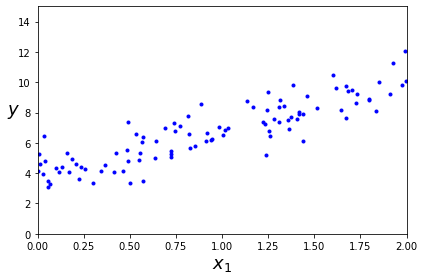

In [7]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

그럼 이제 정규방정식을 사용해 $\hat{\theta}$ 를 계산해봅시다.

넘파이 선형대수 모듈 (np.linalg) 에 있는 inv()를 사용해 역행렬을 계산하고 

dot()을 사용해 행렬곱셈을 하겠습니다.

In [8]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용한 함수는 $\text{y} = 4 + 3 x_1 + $ 가우시안_잡음

정규방정식으로 계산한 값을 확인해봅시다.

In [9]:
theta_best

array([[3.8324793 ],
       [3.07968208]])

$\theta_0 = 3.83$ 과 $\theta_1 = 3.07$ 대신 $\theta_0 = 4$ 와 $\theta_1 = 3$ 을 기대

매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함.

$\hat{\theta}$ 를 사용해 예측해봅시다.

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.8324793 ],
       [9.99184346]])

모델 예측을 위해 그래프를 그려봅시다.

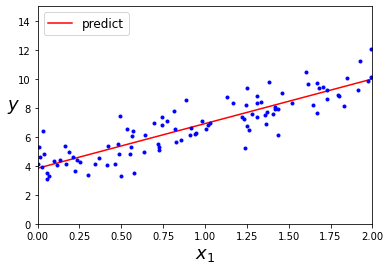

In [24]:
plt.plot(X_new, y_predict, "r-", label="predict")   # 선의 이름은 여기서 설정
plt.legend(loc="upper left", fontsize=12)   # 범례 위치
plt.xlabel("$x_1$", fontsize=18)            # x축 이름
plt.ylabel("$y$", rotation=0, fontsize=18)              # y축 이름
plt.plot(X, y, "b.")          # 파란색 포인트 마커
plt.axis([0, 2, 0, 15])       # x범위 (0 ~ 2.00), y범위 (0 ~ 15.00)

plt.show()

사이킷런에서 선형 회귀를 수행하는 것은 간단.

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.8324793]), array([[3.07968208]]))

LinearRegression 클래스는 scipy.linalg.lstsq()를 기반으로 함. 직접 호출도 가능

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.8324793 ],
       [3.07968208]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 

$\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). 

`np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [27]:
np.linalg.pinv(X_b).dot(y)

array([[3.8324793 ],
       [3.07968208]])

유사역행렬 자체는 특잇값분해(Singular Value Decomposition)라 부르는 표준 행렬 분해 기법을

사용해 계산되고, SVD는 훈련세트행렬 X를 3개의 행렬곱셈 $\mathbf{U} \mathbf{\sum\limits} \mathbf{V}^T$

로 분해 (numpy.linalg.svd() 참고) 유사역행렬은 $\text{X}^+ = \text{V} \mathbf{\sum\limits}^+ \mathbf{U}^T $ 로 계산됨

알고리즘이 먼저 $\mathbf{\sum\limits}$ 를 먼저 구하고 그다음 어떤 낮은 임곗값보다 

작은 모든 수를 0으로 바꿈. 그 다음 0이 아닌 모든 값은 역수로 치환함.

\

마지막으로 만들어진 행렬을 전치함. 정규방정식을 계산하는 것보다 이 방식이 효율적

또한 극단적인 경우도 처리할 수 있음. 실제로 m < n 이거나 어떤 특성이 중복되어 

행렬 $\mathbf{X}^T \mathbf{X}$ 의 역행렬이 없다면 정규방정식이 작동 안 함. 하지만 유사역행렬은 항상 구할 수 있음.